# Test

## Hamiltonians

### Spin lattice model

In [1]:
from spin import *
from fermion import *
from bounds import norm, tight_bound, commutator
from plot_config import *

# from trotter import *

Matplotlib is building the font cache; this may take a moment.


In [70]:
iqp = IQP(6)
iqp.ham

SparsePauliOp(['ZZIIZZ', 'IIZIIZ', 'ZZZIIZ', 'IIZZIZ', 'IZZIZZ', 'IIZZIZ'],
              coeffs=[5.807428+0.j, 2.03521 +0.j, 1.718245+0.j, 0.451692+0.j, 4.762469+0.j,
 1.399856+0.j])

In [3]:
## Test 1D Nearest Neighbour (Heisenberg) Hamiltonian with PBC
n = 4
nnh = Nearest_Neighbour_1d(4, Jx=1, hz=0.2, pbc=True)
nnh.ham
nnh.ham_par
# nnh.ham_xyz

[SparsePauliOp(['IIXX', 'XXII', 'IIIZ', 'IZII'],
               coeffs=[1. +0.j, 1. +0.j, 0.2+0.j, 0.2+0.j]),
 SparsePauliOp(['IXXI', 'XIIX', 'IIZI', 'ZIII'],
               coeffs=[1. +0.j, 1. +0.j, 0.2+0.j, 0.2+0.j])]

In [5]:
## TF Ising with disorder field
n = 4
disorder = np.random.uniform(-0.2, 0.2, n)
tfi = Nearest_Neighbour_1d(4, Jz=1, hx=0.2, pbc=True, rand_field=disorder)
tfi.ham
tfi.ham_xyz

[SparsePauliOp(['IIIX', 'IIXI', 'IXII', 'XIII'],
               coeffs=[0.20706394+0.j, 0.18683248+0.j, 0.16596379+0.j, 0.21782065+0.j]),
 SparsePauliOp(['IIZZ', 'IZZI', 'ZZII', 'ZIIZ'],
               coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])]

In [6]:
tfi_2d = Nearest_Neighbour_2d(3, Jz=1, hx=0.2, pbc=True)
print(tfi_2d.loc_pairs)
print(tfi_2d.xx_tuples)
tfi_2d.ham

[(0, 1), (0, 3), (1, 2), (1, 4), (2, 5), (3, 4), (3, 6), (4, 5), (4, 7), (5, 8), (6, 7), (7, 8)]
[('XX', (0, 1), 0), ('XX', (0, 3), 0), ('XX', (1, 2), 0), ('XX', (1, 4), 0), ('XX', (2, 5), 0), ('XX', (3, 4), 0), ('XX', (3, 6), 0), ('XX', (4, 5), 0), ('XX', (4, 7), 0), ('XX', (5, 8), 0), ('XX', (6, 7), 0), ('XX', (7, 8), 0), ('XX', [0, 2], 0), ('XX', [0, 6], 0), ('XX', [3, 5], 0), ('XX', [1, 7], 0), ('XX', [6, 8], 0), ('XX', [2, 8], 0)]


SparsePauliOp(['IIIIIIIZZ', 'IIIIIZIIZ', 'IIIIIIZZI', 'IIIIZIIZI', 'IIIZIIZII', 'IIIIZZIII', 'IIZIIZIII', 'IIIZZIIII', 'IZIIZIIII', 'ZIIZIIIII', 'IZZIIIIII', 'ZZIIIIIII', 'IIIIIIZIZ', 'IIZIIIIIZ', 'IIIZIZIII', 'IZIIIIIZI', 'ZIZIIIIII', 'ZIIIIIZII', 'IIIIIIIIX', 'IIIIIIIXI', 'IIIIIIXII', 'IIIIIXIII', 'IIIIXIIII', 'IIIXIIIII', 'IIXIIIIII', 'IXIIIIIII', 'XIIIIIIII'],
              coeffs=[1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j,
 1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j,
 1. +0.j, 1. +0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j,
 0.2+0.j, 0.2+0.j, 0.2+0.j])

In [7]:
## Test 1D Power-law decaying Hamiltonian
plh = Power_Law(3, 4, Jx=1, Jz=1, hz=0.2)
plh.ham_xyz

[SparsePauliOp(['IXX', 'XIX', 'XXI'],
               coeffs=[1.    +0.j, 0.0625+0.j, 1.    +0.j]),
 SparsePauliOp(['IZZ', 'ZIZ', 'ZZI', 'IIZ', 'IZI', 'ZII'],
               coeffs=[1.    +0.j, 0.0625+0.j, 1.    +0.j, 0.2   +0.j, 0.2   +0.j, 0.2   +0.j])]

In [3]:
cI = Cluster_Ising(4, h1=1, h2=2, verbose=False)
cI.H

SparsePauliOp(['IIII', 'ZXZI', 'XIII', 'XXII', 'IZXZ', 'IXII', 'IXXI', 'IIXI', 'IIIX', 'IIXX'],
              coeffs=[ 0.+0.j, -1.+0.j, -1.+0.j, -2.+0.j, -1.+0.j, -1.+0.j, -2.+0.j, -1.+0.j,
 -1.+0.j, -2.+0.j])

### Fermi-Hubbard

In [7]:
n = 4
# n = 5
r = 10000
epsilon = 1e-3
J, U = -1, 1

t_num = 100
t_list = np.logspace(-1, 3, num=t_num)
# t_list = np.logspace(1.5, 3, num=t_num)
hubbard = hubbard_openfermion(n, U, verbose=False)
print('one body terms: ', hubbard.one_body_fops)
print('two body terms: ', hubbard.two_body_fops)
h_group = [sum(hubbard.one_body_01_sparse), sum(hubbard.one_body_23_sparse), sum(hubbard.two_body_sparse)]

one body terms:  [-1.0 [0^ 2] +
-1.0 [2^ 0], -1.0 [1^ 3] +
-1.0 [3^ 1], -1.0 [2^ 4] +
-1.0 [4^ 2], -1.0 [3^ 5] +
-1.0 [5^ 3], -1.0 [4^ 6] +
-1.0 [6^ 4], -1.0 [5^ 7] +
-1.0 [7^ 5]]
two body terms:  [1 [0^ 0 1^ 1], 1 [2^ 2 3^ 3], 1 [4^ 4 5^ 5], 1 [6^ 6 7^ 7]]


### Molecules

In [2]:
h2 = Hydrogen_Chain(2, 1.0)

# pstr: 15, ['IIII', 'ZIII', 'IZII', 'IIZI', 'IIIZ', 'ZZII', 'YXXY', 'YYXX', 'XXYY', 'XYYX', 'ZIZI', 'ZIIZ', 'IZZI', 'IZIZ', 'IIZZ']
# groups 2


In [20]:
h2.fermion_hamiltonian

0.52917721092 [] +
-1.110844179883727 [0^ 0] +
0.31320124976475894 [0^ 0^ 0 0] +
0.09839529174273509 [0^ 0^ 2 2] +
0.31320124976475894 [0^ 1^ 1 0] +
0.09839529174273509 [0^ 1^ 3 2] +
0.09839529174273509 [0^ 2^ 0 2] +
0.31085338155985653 [0^ 2^ 2 0] +
0.09839529174273509 [0^ 3^ 1 2] +
0.31085338155985653 [0^ 3^ 3 0] +
0.31320124976475894 [1^ 0^ 0 1] +
0.09839529174273509 [1^ 0^ 2 3] +
-1.110844179883727 [1^ 1] +
0.31320124976475894 [1^ 1^ 1 1] +
0.09839529174273509 [1^ 1^ 3 3] +
0.09839529174273509 [1^ 2^ 0 3] +
0.31085338155985653 [1^ 2^ 2 1] +
0.09839529174273509 [1^ 3^ 1 3] +
0.31085338155985653 [1^ 3^ 3 1] +
0.3108533815598567 [2^ 0^ 0 2] +
0.09839529174273509 [2^ 0^ 2 0] +
0.3108533815598567 [2^ 1^ 1 2] +
0.09839529174273509 [2^ 1^ 3 0] +
-0.5891210037060843 [2^ 2] +
0.09839529174273509 [2^ 2^ 0 0] +
0.3265353734712867 [2^ 2^ 2 2] +
0.09839529174273509 [2^ 3^ 1 0] +
0.3265353734712867 [2^ 3^ 3 2] +
0.3108533815598567 [3^ 0^ 0 3] +
0.09839529174273509 [3^ 0^ 2 1] +
0.310853381559856

In [19]:
h2.molecular_hamiltonian

() 0.52917721092
((0, 1), (0, 0)) -1.110844179883727
((1, 1), (1, 0)) -1.110844179883727
((2, 1), (2, 0)) -0.5891210037060843
((3, 1), (3, 0)) -0.5891210037060843
((0, 1), (0, 1), (0, 0), (0, 0)) 0.31320124976475894
((0, 1), (0, 1), (2, 0), (2, 0)) 0.09839529174273509
((0, 1), (1, 1), (1, 0), (0, 0)) 0.31320124976475894
((0, 1), (1, 1), (3, 0), (2, 0)) 0.09839529174273509
((0, 1), (2, 1), (0, 0), (2, 0)) 0.09839529174273509
((0, 1), (2, 1), (2, 0), (0, 0)) 0.31085338155985653
((0, 1), (3, 1), (1, 0), (2, 0)) 0.09839529174273509
((0, 1), (3, 1), (3, 0), (0, 0)) 0.31085338155985653
((1, 1), (0, 1), (0, 0), (1, 0)) 0.31320124976475894
((1, 1), (0, 1), (2, 0), (3, 0)) 0.09839529174273509
((1, 1), (1, 1), (1, 0), (1, 0)) 0.31320124976475894
((1, 1), (1, 1), (3, 0), (3, 0)) 0.09839529174273509
((1, 1), (2, 1), (0, 0), (3, 0)) 0.09839529174273509
((1, 1), (2, 1), (2, 0), (1, 0)) 0.31085338155985653
((1, 1), (3, 1), (1, 0), (3, 0)) 0.09839529174273509
((1, 1), (3, 1), (3, 0), (1, 0)) 0.3108533

In [18]:
h2.jw

(-0.3276081896748102+0j) [] +
(-0.049197645871367546+0j) [X0 X1 Y2 Y3] +
(0.049197645871367546+0j) [X0 Y1 Y2 X3] +
(0.049197645871367546+0j) [Y0 X1 X2 Y3] +
(-0.049197645871367546+0j) [Y0 Y1 X2 X3] +
(0.13716572937099497+0j) [Z0] +
(0.15660062488237947+0j) [Z0 Z1] +
(0.10622904490856078+0j) [Z0 Z2] +
(0.15542669077992832+0j) [Z0 Z3] +
(0.13716572937099497+0j) [Z1] +
(0.15542669077992832+0j) [Z1 Z2] +
(0.10622904490856078+0j) [Z1 Z3] +
(-0.13036292057109025+0j) [Z2] +
(0.16326768673564335+0j) [Z2 Z3] +
(-0.13036292057109025+0j) [Z3]

## States

In [1]:
from states import *
ghz_state(4)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2, 2, 2))


## Trotter (Product formula)

In [2]:
from trotter import pf
from spin import Nearest_Neighbour_1d

nnh = Nearest_Neighbour_1d(4, Jx=1, hz=0.2, pbc=True)
## different input formats: standard, sparse, jax
pf(nnh.ham_par, 2, 100, order=2)   # use scipy
pf(nnh.ham_par, 2, 100, order=2, use_jax=True)  # use jax
pf([term.to_matrix(True) for term in nnh.ham_par], 2, 100, order=2)   # use sparse

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:602: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)


<16x16 sparse matrix of type '<class 'numpy.complex128'>'
	with 128 stored elements in Compressed Sparse Row format>

### high-order PF

++++++++++

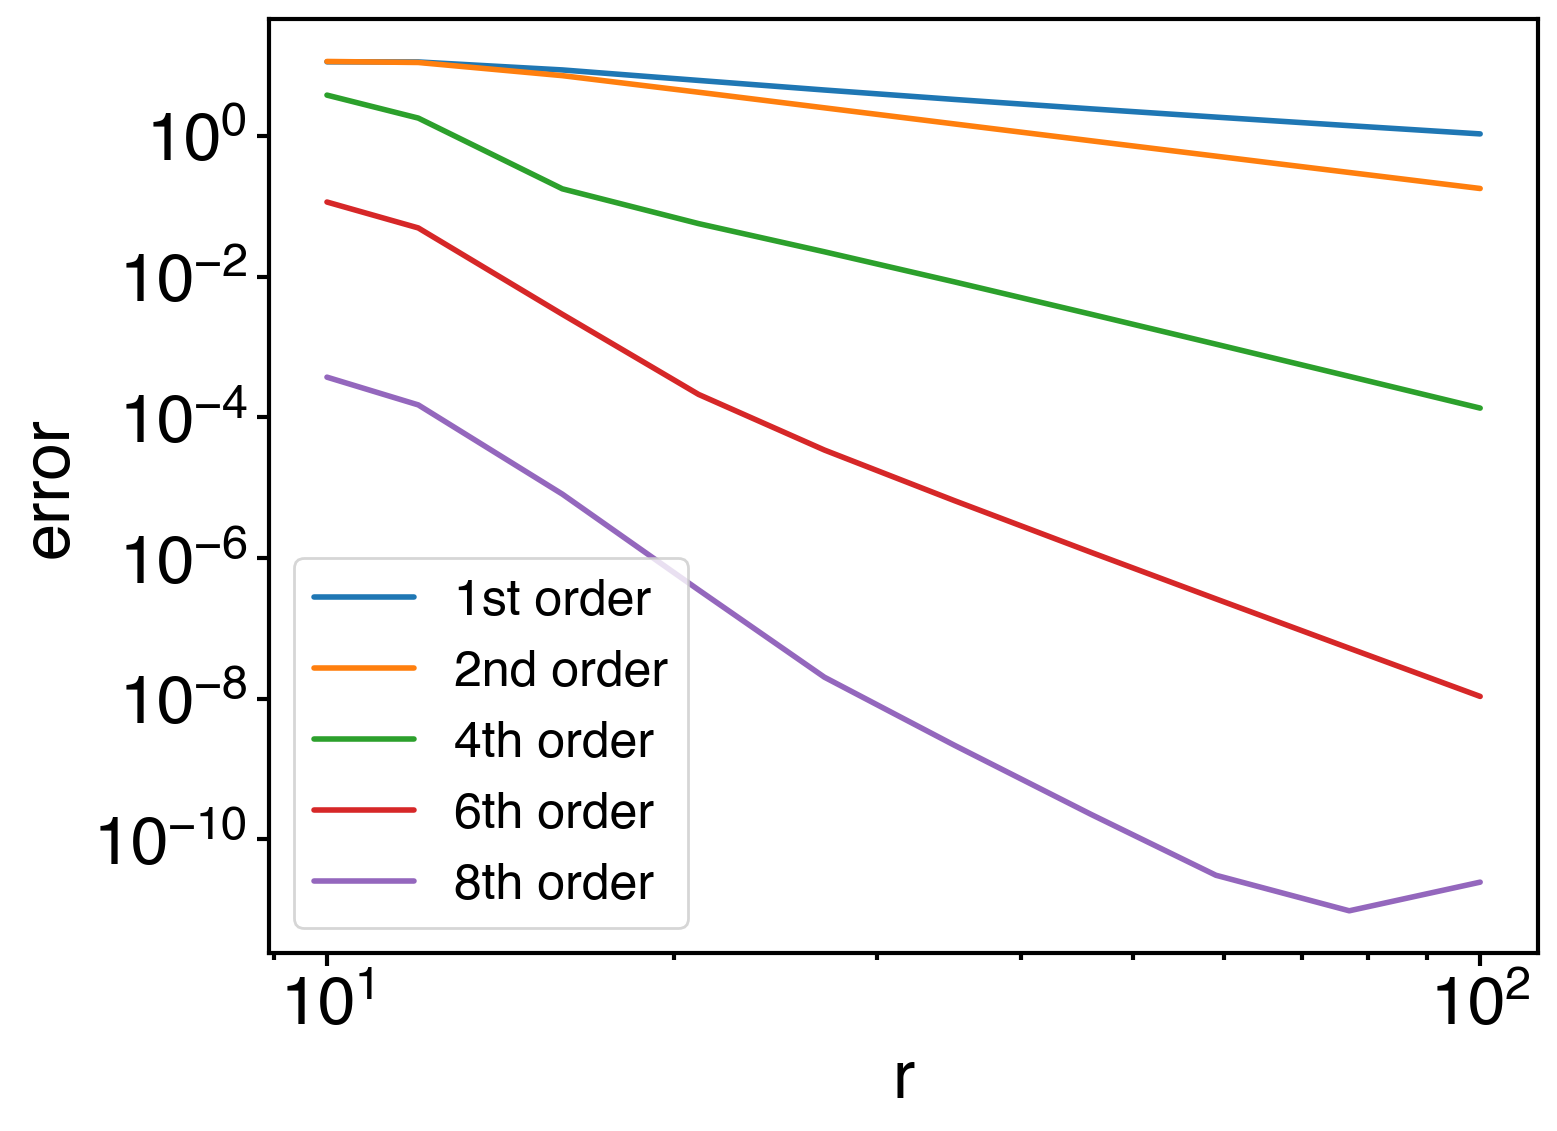

In [3]:
from trotter import pf, pf_high, expH
import matplotlib.pyplot as plt

n = 6
t, r = 10, 100
qimf = Nearest_Neighbour_1d(n, hx=0.8090, hy=0.9045,Jx=1, pbc=False)
H_list = qimf.ham_par

r_list = np.logspace(1, 2, 10, dtype=int)
err_list = []
U = expH(sum(H_list), t)
for r in r_list:
    print('+', end='')
    appro_U1 = pf(H_list, t, r, order=1)
    appro_U2 = pf(H_list, t, r, order=2)
    appro_U4 = pf_high(H_list, t, r, order=4)
    appro_U6 = pf_high(H_list, t, r, order=6)
    appro_U8 = pf_high(H_list, t, r, order=8)

    err_list.append([np.linalg.norm(appro_U1 - U), np.linalg.norm(appro_U2 - U), np.linalg.norm(appro_U4 - U), np.linalg.norm(appro_U6 - U), np.linalg.norm(appro_U8 - U)])

err_list = np.array(err_list)   

fig, ax = plt.subplots()
ax.plot(r_list, err_list[:, 0], label='1st order')
ax.plot(r_list, err_list[:, 1], label='2nd order')
ax.plot(r_list, err_list[:, 2], label='4th order')
ax.plot(r_list, err_list[:, 3], label='6th order')
ax.plot(r_list, err_list[:, 4], label='8th order')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('r')
ax.set_ylabel('error')
ax.legend()


a_em: -1.0169537928373735; b_em: 1.8421204163870155
a_em: -2.0012645749513407; b_em: 4.996488874799091


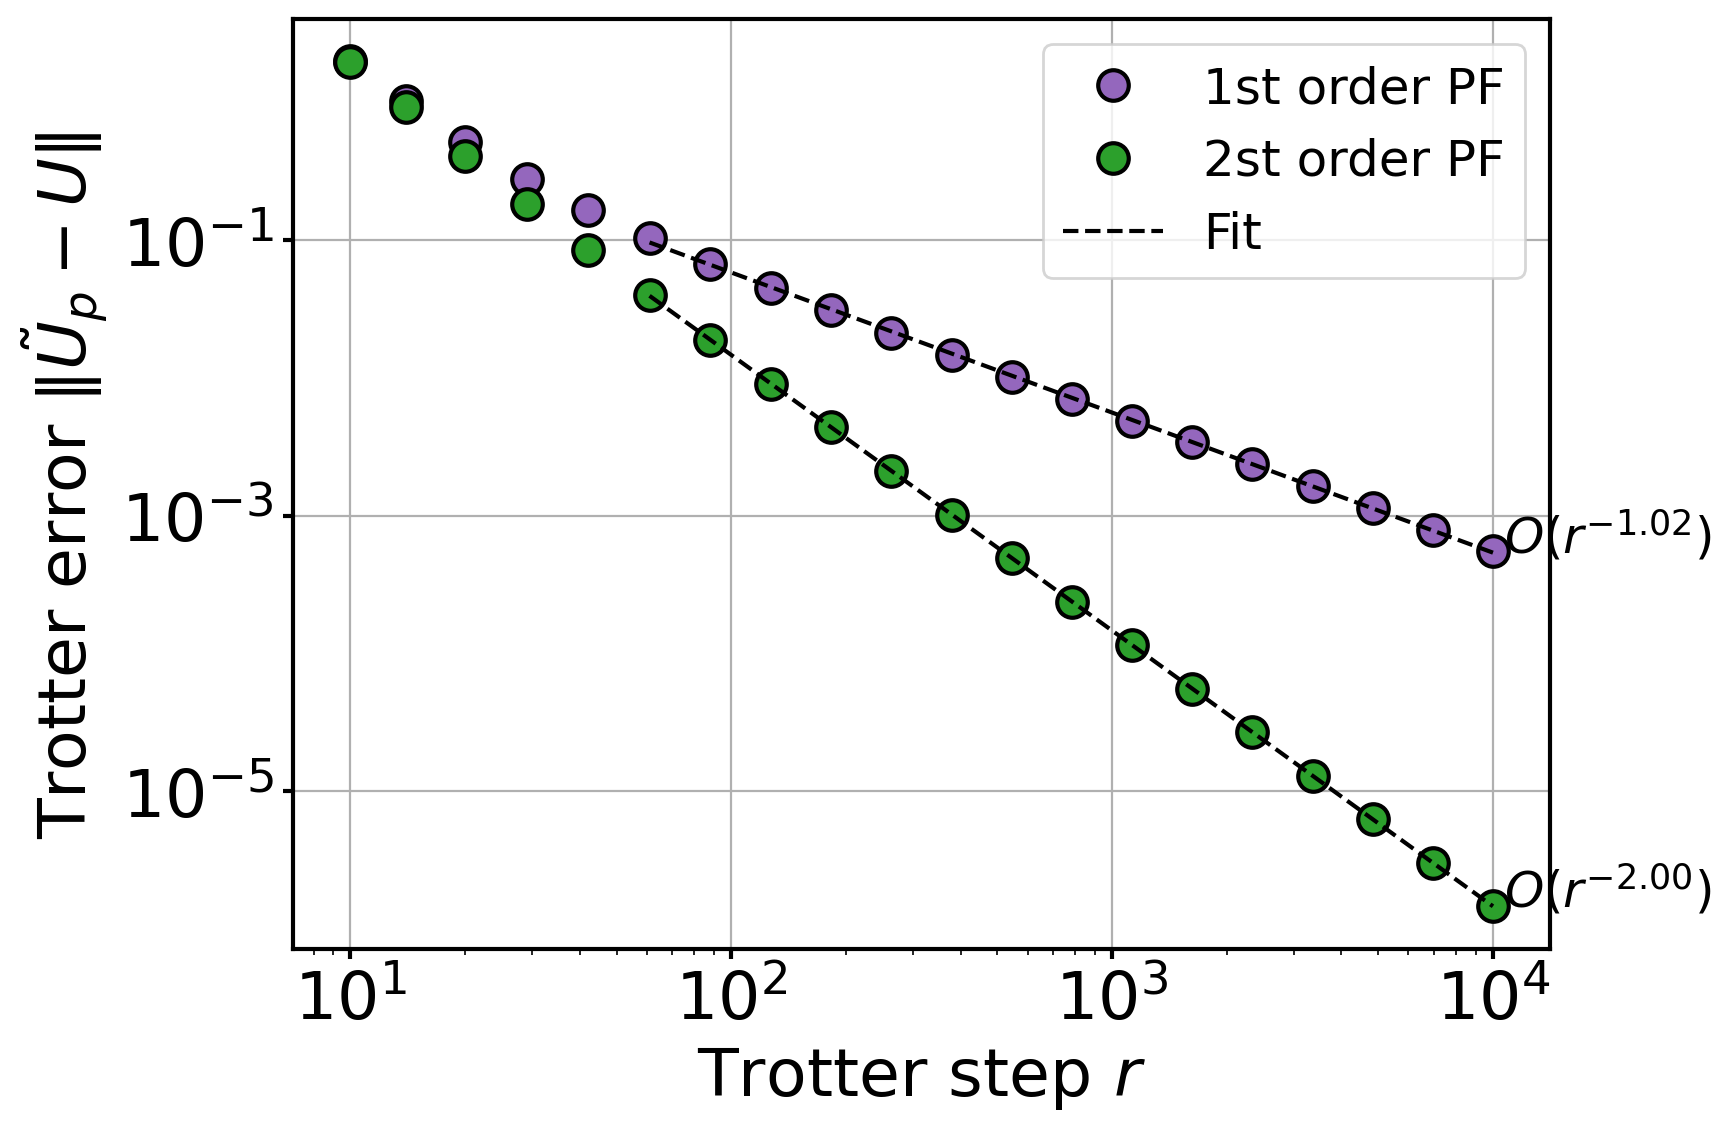

In [46]:
from trotter import pf, expH
from bounds import commutator, norm
from plot_config import *
set_color_cycle(['#9467bdFF', '#2ca02cFF', '#d62728FF', '#1f77b4FF', '#ff7f0eFF', '#8c564bFF'])
n = 6
t = 2*n
nnh = Nearest_Neighbour_1d(n, Jx=1, hz=0.2, pbc=True)
r_list = sorted(list(set(np.logspace(1, 4, 20, dtype=int))))
exact_U = expH(nnh.ham, t)
err_list1 = [norm(pf(nnh.ham_xyz, t, r, order=1) - exact_U, ord=2) for r in r_list]
err_list2 = [norm(pf(nnh.ham_xyz, t, r, order=2) - exact_U, ord=2) for r in r_list]

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.plot(r_list, err_list1, 'o', label='1st order PF')
ax.plot(r_list, err_list2, 'o', label='2st order PF')
plot_fit(ax, r_list[5:], err_list1[5:], var='r', label='Fit')
plot_fit(ax, r_list[5:], err_list2[5:], var='r')
ax_set_text(ax, r'Trotter step $r$', r'Trotter error $\|\tilde{U}_p - U\|$', log='xy')

### bounds

In [35]:
from bounds import *

## Pauli algebra

In [48]:
# ! pip install quantum_simulation_recipe

In [49]:
from spin import Nearest_Neighbour_1d
n = 6
J, h = 1, 0.2 
tfI = Nearest_Neighbour_1d(n=n, Jz=J, hx=h, hy=0, pbc=True)
print('====Parity grouping==== \n Even: ', tfI.ham_par[0], '\n Odd: ', tfI.ham_par[1])
print('====XYZ grouping==== \n', tfI.ham_xyz)

====Parity grouping==== 
 Even:  SparsePauliOp(['IIIIZZ', 'IIZZII', 'ZZIIII', 'IIIIIX', 'IIIXII', 'IXIIII'],
              coeffs=[1. +0.j, 1. +0.j, 1. +0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j]) 
 Odd:  SparsePauliOp(['IIIZZI', 'IZZIII', 'ZIIIIZ', 'IIIIXI', 'IIXIII', 'XIIIII'],
              coeffs=[1. +0.j, 1. +0.j, 1. +0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j])
====XYZ grouping==== 
 [SparsePauliOp(['IIIIIX', 'IIIIXI', 'IIIXII', 'IIXIII', 'IXIIII', 'XIIIII'],
              coeffs=[0.2+0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j, 0.2+0.j]), SparsePauliOp(['IIIIZZ', 'IIIZZI', 'IIZZII', 'IZZIII', 'ZZIIII', 'ZIIIIZ'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])]


In [23]:
from bounds import commutator, norm
cmm_xyz = commutator(tfI.ham_xyz[0], tfI.ham_xyz[1]).simplify()
print('commutator of xyz grouping: \n', cmm_xyz)

commutator of xyz grouping: 
 SparsePauliOp(['IIIIZY', 'ZIIIIY', 'IIIIYZ', 'IIIZYI', 'IIIYZI', 'IIZYII', 'IIYZII', 'IZYIII', 'IYZIII', 'ZYIIII', 'YZIIII', 'YIIIIZ'],
              coeffs=[0.-0.4j, 0.-0.4j, 0.-0.4j, 0.-0.4j, 0.-0.4j, 0.-0.4j, 0.-0.4j, 0.-0.4j,
 0.-0.4j, 0.-0.4j, 0.-0.4j, 0.-0.4j])


In [24]:
## observable
from qiskit.quantum_info import SparsePauliOp
magn_op = SparsePauliOp.from_sparse_list([('Z', [i], 1) for i in range(0, n)], n)
print('Magnetization operator: ', magn_op)
corr_op = SparsePauliOp.from_sparse_list([('ZZ', [i,i+1], 1/(n-1)) for i in range(0, n-1)], n)
cmm_H_magn = commutator(tfI.ham_xyz[0]+tfI.ham_xyz[1], magn_op).simplify()
print('[M, H]=', cmm_H_magn)

Magnetization operator:  SparsePauliOp(['IIIIIZ', 'IIIIZI', 'IIIZII', 'IIZIII', 'IZIIII', 'ZIIIII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])
[M, H]= SparsePauliOp(['IIIIIY', 'IIIIYI', 'IIIYII', 'IIYIII', 'IYIIII', 'YIIIII'],
              coeffs=[0.-0.4j, 0.-0.4j, 0.-0.4j, 0.-0.4j, 0.-0.4j, 0.-0.4j])


In [25]:
print('spectral norm: ', norm(cmm_xyz, ord=2))
print('induced 1-norm: ', norm(cmm_xyz.coeffs, ord=1))
print('Frobenius norm: ', norm(cmm_xyz, ord='fro'))
print('trace (nuclear) norm: ', norm(cmm_xyz, ord='nuc'))

spectral norm:  3.2000000000000006
induced 1-norm:  4.800000000000001
Frobenius norm:  11.085125168440818
trace (nuclear) norm:  71.65537550532244


## Channel  

In [3]:
from channel import *   
test = np.array([[0, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 0]])  
mat2pauli(test, return_dict=True, verbose=True)

num_qubits= 2
pauli_basis= ['II', 'IX', 'IY', 'IZ', 'XI', 'XX', 'XY', 'XZ', 'YI', 'YX', 'YY', 'YZ',
 'ZI', 'ZX', 'ZY', 'ZZ']


{Pauli('II'): 0j,
 Pauli('IX'): 0j,
 Pauli('IY'): 0j,
 Pauli('IZ'): 0j,
 Pauli('XI'): 0j,
 Pauli('XX'): (2+0j),
 Pauli('XY'): 0j,
 Pauli('XZ'): 0j,
 Pauli('YI'): 0j,
 Pauli('YX'): 0j,
 Pauli('YY'): (2+0j),
 Pauli('YZ'): 0j,
 Pauli('ZI'): 0j,
 Pauli('ZX'): 0j,
 Pauli('ZY'): 0j,
 Pauli('ZZ'): 0j}

## Misc

### Fitting

a_em: -2.0000000049379913; b_em: 2.14792833843125e-08
a_em: 3.999999991435596; b_em: 9.868424577491298e-09
a_em: 2.9999999986770787; b_em: 2.063481358442302e-09
a_em: 3.299999992579543; b_em: 3.8760575576672715e-08


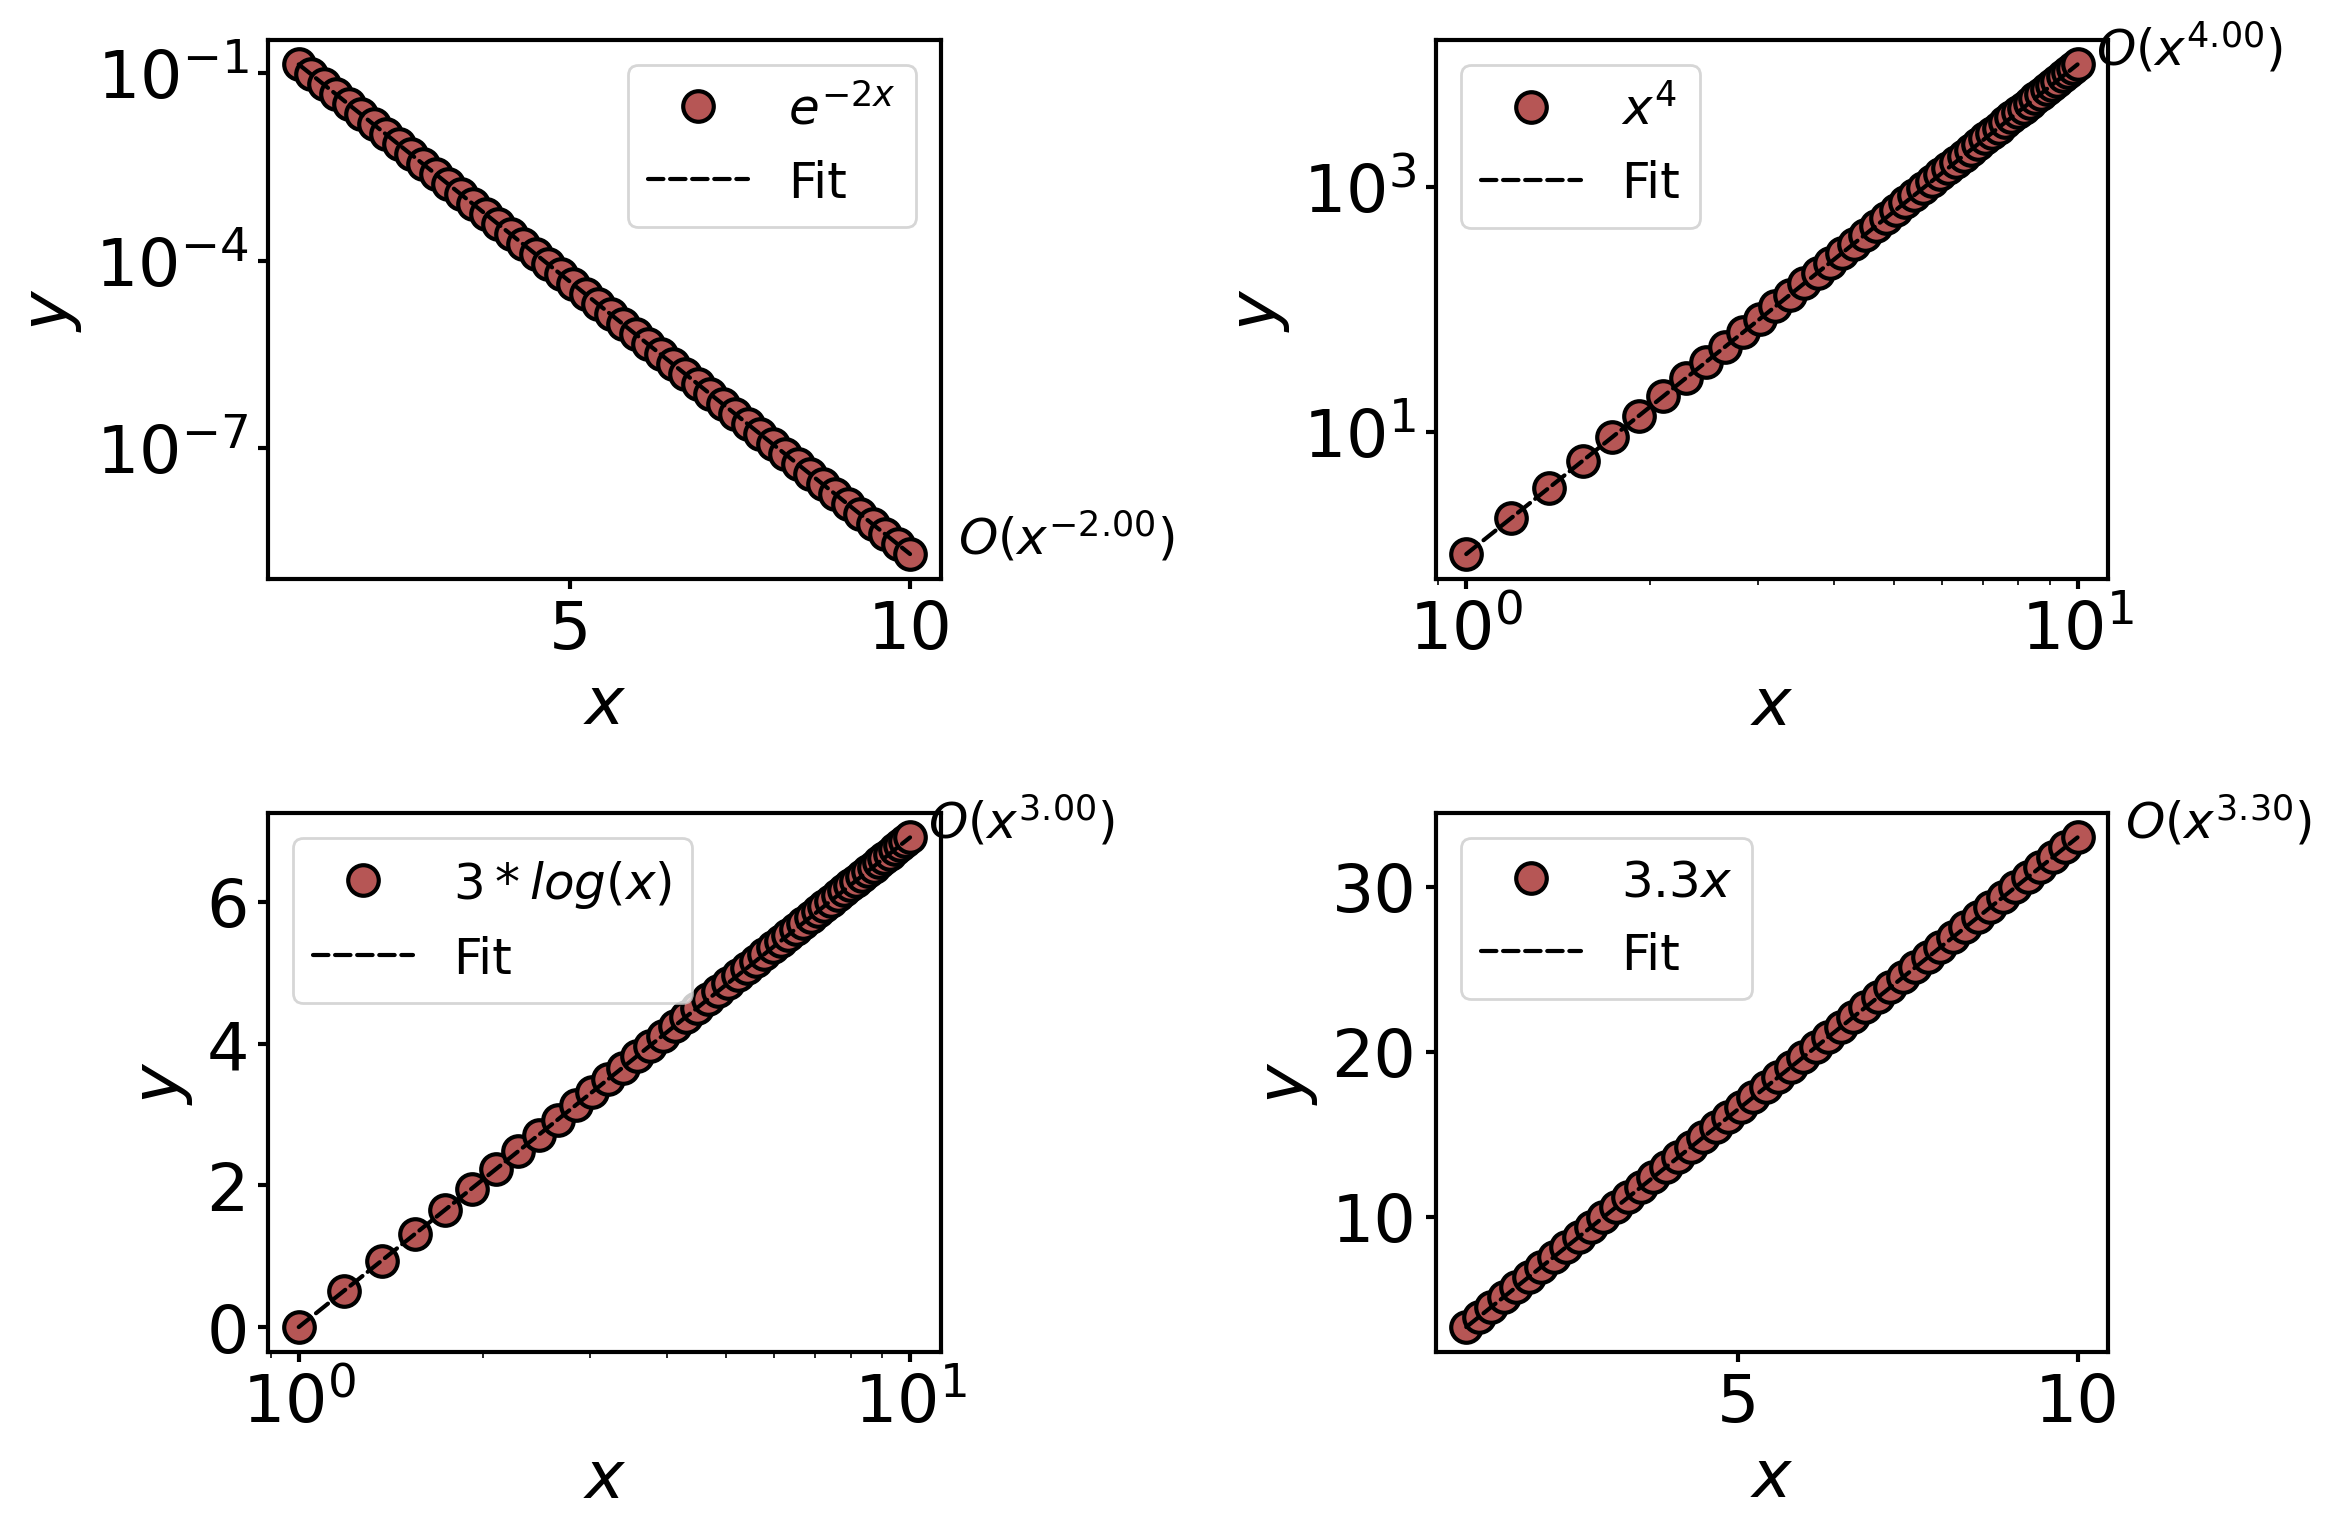

In [31]:
from plot_config import *   
set_color_cycle(default_color_cycle)
x_list = np.linspace(1, 10, 50)
y_exp_list = [exp(-2*x) for x in x_list]
y_pow_list = [x**4 for x in x_list]
y_log_list = [3*np.log(x) for x in x_list]
y_lin_list = [3.3*x for x in x_list]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0,0].plot(x_list, y_exp_list, 'o', label=r'$e^{-2x}$')
plot_fit(axes[0,0], x_list, y_exp_list, var='x', log_axis='y', label='Fit')
ax_set_text(axes[0,0], r'$x$', r'$y$', log='y')

axes[0,1].plot(x_list, y_pow_list, 'o', label=r'$x^4$')
plot_fit(axes[0,1], x_list, y_pow_list, var='x', log_axis='xy', label='Fit')
ax_set_text(axes[0,1], r'$x$', r'$y$', log='xy')

axes[1,0].plot(x_list, y_log_list, 'o', label='$3*log(x)$')
plot_fit(axes[1,0], x_list, y_log_list, var='x', log_axis='x', label='Fit')
ax_set_text(axes[1,0], r'$x$', r'$y$', log='x')

axes[1,1].plot(x_list, y_lin_list, 'o', label=r'$3.3x$')
plot_fit(axes[1,1], x_list, y_lin_list, var='x', log_axis='', label='Fit')
ax_set_text(axes[1,1], r'$x$', r'$y$', log='')